In [89]:
import numpy as np
import pandas as pd
import seaborn as sns ;sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Read data from csv
iris = pd.read_csv("data/Iris.csv")
print(iris.head())

# Plot the various combinations of 2D graph
#g = sns.pairplot(iris.drop("Id", axis=1), hue="Species")

# Replace the species with 0, 1 or 2 as appropriate
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# Get labels, flatten and encode to one-hot
columns = ['Species']
labels = pd.DataFrame(iris, columns=columns).to_numpy()
labels = labels.flatten()
labels = np.eye(np.max(labels) + 1)[labels]

# Get Features
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features = pd.DataFrame(iris, columns=columns).to_numpy()

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33)

   Id  SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


train and test

Epoch: 0 Error: 0.23348 Accuracy: 17.0% Test Error: 0.22853 Accuracy: 50.0%
Epoch: 10 Error: 0.21368 Accuracy: 72.0% Test Error: 0.2226 Accuracy: 56.0%
Epoch: 20 Error: 0.20126 Accuracy: 72.0% Test Error: 0.21234 Accuracy: 56.0%
Epoch: 30 Error: 0.18184 Accuracy: 72.0% Test Error: 0.19682 Accuracy: 56.0%
Epoch: 40 Error: 0.15963 Accuracy: 72.0% Test Error: 0.17885 Accuracy: 56.0%
Epoch: 50 Error: 0.14155 Accuracy: 72.0% Test Error: 0.16389 Accuracy: 56.0%
Epoch: 60 Error: 0.12914 Accuracy: 72.0% Test Error: 0.15321 Accuracy: 56.0%
Epoch: 70 Error: 0.12091 Accuracy: 72.0% Test Error: 0.14572 Accuracy: 56.0%
Epoch: 80 Error: 0.11524 Accuracy: 72.0% Test Error: 0.14024 Accuracy: 56.0%
Epoch: 90 Error: 0.11102 Accuracy: 72.0% Test Error: 0.13594 Accuracy: 56.0%
Epoch: 100 Error: 0.1076 Accuracy: 72.0% Test Error: 0.1323 Accuracy: 56.0%
Epoch: 110 Error: 0.10462 Accuracy: 73.0% Test Error: 0.12901 Accuracy: 56.0%
Epoch: 120 Error: 0.10186 Accuracy: 73.0% Test Error: 0.12588 Accuracy: 58.0%


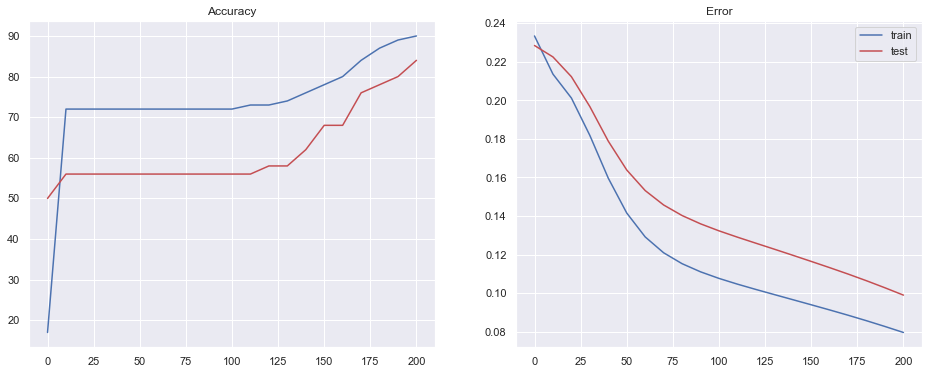

In [97]:
# Sigmoid acivation function and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Learning rate
learning_rate = 0.01

# Number of training epochs
num_epochs = 200

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 6

# Initialise weights in the range -0.5 to 0.5
# Hidden layer weights with shape = number of input features x number of hidden nodes
hidden_weights = np.random.uniform(-0.5, 0.5, size=(num_features, num_hidden_nodes))
hidden_bias = np.random.uniform(-0.5, 0.5, size=(1, num_hidden_nodes))
# Output layer weights with shape = number of hidden nodes x number of output classes
output_weights = np.random.uniform(-0.5, 0.5, size=(num_hidden_nodes, num_classes))
output_bias = np.random.uniform(-0.5, 0.5, size=(1, num_classes))

# For recording error and accuracy - for graph later
train_errors, test_errors = [], []
train_accuracies, test_accuracies = [], []

# Train for number of epochs
for epoch in range(num_epochs+1):

    """ Forward Pass """ 
    input_layer = train_x
    # sigmoid( (W * X) + b)
    hidden_layer = sigmoid(np.dot(input_layer, hidden_weights) + hidden_bias)
    output_layer = sigmoid(np.dot(hidden_layer, output_weights) + output_bias)

    """ Backpropagation  """ 
    # Calculate output layer error
    output_layer_error = (train_y - output_layer)

    # Calculate output layer gradient from error and derivative of output
    # Note: that we just need this layers error for the bias
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer)
    output_bias_delta = np.sum(output_layer_error, axis=0)
    
    # Calculate hidden layer error (from the output layers weights and gradient)
    hidden_layer_error = output_layer_delta.dot(output_weights.T)
    
    # Calculate hidden layer gradient
    # Note: that we just need this layers error for the bias
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)
    hidden_bias_delta = np.sum(hidden_layer_error, axis=0)

    """ Update the Weights """
    # (learning rate X layers input X layers gradient)
    output_weights += learning_rate * hidden_layer.T.dot(output_layer_delta)
    output_bias += learning_rate * output_bias_delta
    
    hidden_weights += learning_rate * input_layer.T.dot(hidden_layer_delta)
    hidden_bias += learning_rate * hidden_bias_delta

    # Every 100 epochs record error and accuracy during training
    if (epoch % 10) == 0:
        
        # Mean squared error over all errors this epoch
        error = np.square(output_layer_error).mean() 
        train_errors.append(error)

        accuracy_count = 0
        for i in range(len(output_layer)):
          
            # Get the prediction i.e. the output with the highest value
            prediction = np.argmax(output_layer[i])
            # Get the actual label
            actual_label = np.argmax(train_y[i])
            
            # If they match the prediction was correct
            if prediction == actual_label:
                accuracy_count += 1
        accuracy = (100 / len(train_x)) * accuracy_count
        train_accuracies.append(accuracy)
               
        # Forward pass
        test_hidden = sigmoid(np.dot(test_x, hidden_weights) + hidden_bias)
        test_output = sigmoid(np.dot(test_hidden, output_weights) + output_bias)
        test_output_error = test_y - test_output
        # Mean squared error over all errors
        test_error = np.square(test_output_error).mean()
        test_errors.append(test_error)

        test_accuracy_count = 0
        for j in range(len(test_output)):

            # Get the prediction i.e. the output with the highest value
            test_prediction = np.argmax(test_output[j])
            # Get the actual label
            actual_label = np.argmax(test_y[j])

            # If they match the prediction was correct
            if test_prediction == actual_label:
                test_accuracy_count += 1

        test_accuracy = (100 / len(test_x)) * test_accuracy_count
        test_accuracies.append(test_accuracy)
        
           
        
        print("Epoch: " + str(epoch) +
              " Error: " + str(round(error, 5)) +
              " Accuracy: " + str(accuracy) + "%" +
              " Test Error: " + str(round(test_error, 5)) +
              " Accuracy: " + str(test_accuracy) + "%")


x_range = [i*10 for i in range(len(train_errors))]
figure, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.lineplot(x=x_range, y=train_accuracies, color='b', ax=ax[0])
sns.lineplot(x=x_range, y=test_accuracies, color='r', ax=ax[0])
ax[0].title.set_text("Accuracy")
sns.lineplot(x=x_range, y=train_errors, color='b', ax=ax[1])
sns.lineplot(x=x_range, y=test_errors, color='r', ax=ax[1])
ax[1].title.set_text("Error")
ax[1].legend(['train', 'test'])
plt.show()